## Linear regression with Student's t-distributed errors
The [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (commonly referred to as the *t-distribution*) is a commonly used [fat-tailed distribution](https://en.wikipedia.org/wiki/Fat-tailed_distribution) that has a similar bell-shape to the normal distribution, but places more probability mass in the tails of the distribution. We consider the linear regression model with t-distributed errors for two reasons:
1. Many people have demonstrated that models with t-distributed errors tend to fit financial and macroeconomic data better than Normal distributed errors (see, e.g. [Geweke (1993)](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.3950080504), [Cross and Poon (2016)](https://www.sciencedirect.com/science/article/pii/S0264999316301237), [Chiu, Mumtaz and Pinter (2017)](https://www.sciencedirect.com/science/article/pii/S016920701730033X) and [Chan (2020)](https://amstat.tandfonline.com/doi/full/10.1080/07350015.2018.1451336)).
2. Since the t-distribution [converges to a normal distribution when the degree of freedom is large](https://math.stackexchange.com/questions/3240536/convergence-of-students-t-distribution-to-a-standard-normal), the linear regression model with t-distributed errors is more robust against misspecification relative to the normal linear regression model.


In [1]:
# Load packages
using Distributions    # Work with standard probability distributions
using Interact         # Create widgets 
using Plots            # Create plots
using LinearAlgebra    # Use extra linear algebra functions such as the identity matrix I(n)
using Printf           # Print results
using SpecialFunctions # Use loggamma, digamma and trigamma functions

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11290798810397773385\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5425618077334755995\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11290798810397773385\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
# Widget comparing standard Normal and Student's t distributions for different degree of freedom
    @manipulate for nu in 1:1:100
        dist1 = TDist(nu)
        dist2 = Normal(0,1)
        plot([x -> pdf(dist1, x), x -> pdf(dist2, x)], 
            title = "Probability density function", 
            labels = ["Student's t" "Normal"])
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nu"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\jamie\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\jamie\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\jamie\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\jamie\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\jamie\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000043a133d0, Task (runnable) @0x0000000043a133d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\

## Model
Let $y_t$ denote an observation of a time series of interest at date t, $t=1,\dots,T$, which we believe are driven by various independent time series observations $x_{i,t}$, $i=2,\dots,k$. Then, the linear regression model is given by
$$
y_{t} =\beta_{1}+x_{2,t}\beta_{2} + \dots + x_{k,t}\beta_{k}+\varepsilon_{t},
$$
in which $\varepsilon_{t}$ is a random error term. In this lecture we assume that the errors are independent and identically distributed (iid) according to 
$$
\varepsilon_{t} {\sim}T\left(0,\sigma^{2},\nu\right)
$$
in which $T\left(0,\sigma^{2},\nu\right)$ denotes a Student's t-distribution located at $0$, with variance $\sigma^2$ and degree of freedom parameter $\nu$.

### Scale mixture of normals representation of the Student's t-distribution
Instead of working directly with the Student's t-distribution, it's convenient to follow [Geweke (1993)](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.3950080504) and exploit the equivalence of the Student's t-distribution and an appropriate *scale mixture of normals*. This is because it transforms the problem into an extended normal linear regression model and enables us to employ a similar Gibbs sampler to the one we derived for that model.

The key insight is that if a random variable $X$ is distributed such that
$$
\begin{align}
X|\lambda&\sim N(0,\lambda\sigma^2)\\
\lambda&\sim IG(\frac{\nu}{2},\frac{\nu}{2})
\end{align}
$$
then the marginal distribution of $X$ (after integrating out the [latent variable](https://en.wikipedia.org/wiki/Latent_variable) $\lambda$) is $T\left(0,\sigma^{2},\nu\right)$.

**Remarks**:
1. **Proof**: A proof can be found in [Geweke (1993)](https://onlinelibrary.wiley.com/doi/abs/10.1002/jae.3950080504).
2. **Mixture models**: This representation of the Student's t distribution is an example of a [mixture model](https://en.wikipedia.org/wiki/Mixture_model). For more details see Chapter 15 of [Bayesian Econometric Methods (Econometric Exercises)](https://www.amazon.com/Bayesian-Econometric-Methods-Exercises/dp/0521671736).

This means that we can equivalently assume that the errors are distributed according to 
$$
\begin{align}
\varepsilon_t|\lambda_t&\sim N(0,\lambda_t\sigma^2)\\
\lambda_t&\sim IG(\frac{\nu}{2},\frac{\nu}{2})
\end{align}
$$

## Estimation
To estimate the model, we use matrix representation of the equation system
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon},
$$
in which $\mathbf{y}=(y_1,\dots,y_T)'$, $\boldsymbol{\beta}={\beta_1,\dots,\beta_k}$, $\boldsymbol{\varepsilon}={\varepsilon,\dots,\varepsilon_T}$ and 
$$
\mathbf{X} = \left[\begin{array}{cc}
1 & x_{2,1} & x_{3,1} & \dots & x_{k,1} \\
1 & x_{2,2} & x_{3,2} & \dots & x_{k,2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{2,T} & x_{3,T} & \dots & x_{k,T} \\
\end{array}\right]
$$
where
$$
\boldsymbol{\varepsilon}|\boldsymbol{\lambda} {\sim}N\left(\mathbf{0},\boldsymbol{\Sigma}\right)
$$
in which $\boldsymbol{\lambda}=(\lambda_1,\dots,\lambda_T)'$ and $\boldsymbol{\Sigma}=\sigma^2\boldsymbol{\Lambda}$ where $\boldsymbol{\Lambda}=\text{diag}(\lambda_1,\dots,\lambda_T)$ is a diagonal matrix.  

The probability model representation of the model is given by
$$
\begin{align}
\mathbf{y} &\sim N(\mathbf{X}\boldsymbol{\beta},\sigma^2\boldsymbol{\Lambda})\\
\lambda_t &\sim IG(\frac{\nu}{2},\frac{\nu}{2}) \quad t=1,\dots,T
\end{align}
$$
Estimating the linear regression model with Student's t-distributed distributed errors is therefore the same as estimating (1) the parameters of a multivariate normal distribution, (2) a vector of inverse-Gamma distributed latent variables and (3) the parameters of an inverse-Gamma distribution.

To estimate the model parameters $\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda}$ and $\nu$ with Bayesian methods we apply Bayes rule
$$
p(\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda},\nu|\mathbf{y}) \propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda},\nu)\\
$$
in which $p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})$ is the likelihood function and $p(\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda},\nu)$ is the (joint) prior distribution. We now consider each in turn.

**Remarks**:
1. **Independence**: Since the likelihood does not contain the degree of freedom parameter $\nu$ in any terms, it follows that $p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda},\nu)=p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})$.

### Likelihood
Using the probability model representation, the likelihood is the same form as the normal linear regression model (but with different $\boldsymbol{\Sigma}$) 
$$
p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda}) = (2\pi\sigma^2)^{-\frac{T}{2}}\exp(-\frac{1}{2}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'\boldsymbol{\Sigma}^{-1}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}))
$$

### Priors 
As discussed in the lecture on the normal linear regression model, we need to take a stance on the dependence between the model between the regression parameters and the error variance. Here we will assume independent prior distributions, so that $p(\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda},\nu)=p(\boldsymbol{\beta})p(\sigma^2)p(\boldsymbol{\Lambda}|\nu)p(\nu)$. The dependence of $\boldsymbol{\Lambda}$ on $\nu$ follows directly from the model specification, i.e. $p(\boldsymbol{\Lambda},\nu)=p(\boldsymbol{\Lambda}|\nu)p(\nu)$. 
 
In particular, we specify
1. $\boldsymbol{\beta}\sim N(\mathbf{m}_0,\mathbf{V}_0)$
2. $\sigma^2\sim IG(\alpha_0,S_0)$
3. $\lambda_t|\nu\sim IG(\frac{\nu}{2},\frac{\nu}{2})$ 
4. $\nu\sim U(2,\bar{\nu})$

**Remarks**: 
1. **Moment conditions**: Assuming $\nu>2$ ensures that the variance of the error term exists. 
2. **Notation**: We change notation of the scale parameter in the inverse-Gamma prior distribution for the error variance from $\nu_0$ to $\alpha_0$ to avoid any confusion with that hyperparameter and the degree of freedom parameter.

### Posterior
Given our knowledge from the normal linear regression model, we know that the posterior distribution will be an unknown form. We therefore skip the algebra and go directly to posterior simulation. To that end, we will use a four Gibbs sampler with full conditional distributions:
1. $p(\boldsymbol{\beta}|\mathbf{y},\sigma^2,\boldsymbol{\Lambda},\nu)=p(\boldsymbol{\beta}|\mathbf{y},\sigma^2,\boldsymbol{\Lambda})\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\boldsymbol{\beta})$
2. $p(\sigma^2|\mathbf{y},\boldsymbol{\beta},\boldsymbol{\Lambda},\nu)=p(\sigma^2|\mathbf{y},\boldsymbol{\beta},\boldsymbol{\Lambda})\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\sigma^2)$
3. $p(\boldsymbol{\lambda}|\mathbf{y},\boldsymbol{\beta},\sigma^2,\nu)\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\boldsymbol{\lambda}|\nu)$
4. $p(\nu|\mathbf{y},\boldsymbol{\beta},\boldsymbol{\Lambda},\sigma^2)=p(\nu|\boldsymbol{\Lambda})\propto p(\boldsymbol{\Lambda}|\nu)p(\nu)$

#### Steps 1 and 2: Sampling $\boldsymbol{\beta}$ and $\sigma^2$
We derive the distributions in blocks 1 and 2 using the same steps as in the normal linear regression model and therefore leave it as an exercise to show that the results are
$$
\begin{align}
\boldsymbol{\beta}|\mathbf{y},\sigma^2,\boldsymbol{\Lambda},\nu &\sim N(\hat{\boldsymbol{\beta}},\mathbf{D}_\beta)\\
\sigma^2|\mathbf{y},\boldsymbol{\beta},\boldsymbol{\Lambda},\nu &\sim IG(\alpha,S)
\end{align}
$$
in which 
$$
\begin{align}
\hat{\boldsymbol{\beta}}&=\mathbf{D}_\beta(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{y} + \mathbf{V}_0^{-1}\mathbf{m}_0)\\
\mathbf{D}_{\beta}&=(\mathbf{X}'\boldsymbol{\Sigma}^{-1}\mathbf{X}+\mathbf{V}_0^{-1})^{-1}\\
\alpha &= \frac{T}{2}+\alpha_0\\
S &= S_0 + (\mathbf{y}-\mathbf{X}\boldsymbol{\beta})'\boldsymbol{\Lambda}^{-1}(\mathbf{y}-\mathbf{X}\boldsymbol{\beta})
\end{align}
$$ 

#### Step 3: Sampling $\boldsymbol{\lambda}$
Let $\mathbf{x}_t=(1,x_{2,t},\dots,x_{k,t})'$, then
$$
\begin{align}
p(\boldsymbol{\lambda}|\mathbf{y},\boldsymbol{\beta},\nu) &\propto p(\mathbf{y}|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\boldsymbol{\lambda}|\nu)\\
&=\prod_{t=1}^{T}p(y_t|\boldsymbol{\beta},\sigma^2,\boldsymbol{\Lambda})p(\lambda_t|\nu)\\
&=\prod_{t=1}^{T}(2\pi\lambda_t\sigma^2)^{-1/2}\exp(-\frac{1}{2\lambda_t\sigma^2}(y_t-\mathbf{x}'_t\boldsymbol{\beta})^2)\lambda_t^{-(\frac{\nu}{2}+1)}\exp(-\frac{\nu}{2\lambda_t})\\
&\propto\prod_{t=1}^{T}(\lambda_t)^{-(\frac{\nu+1}{2}+1)}\exp(-\frac{1}{2\lambda_t}(\nu + \frac{1}{\sigma^2}(y_t-\mathbf{x}'_t\boldsymbol{\beta})^2)\\
\end{align}
$$
which is a product of inverse-gamma kernels with scale parameter $\nu_\lambda=\frac{\nu+1}{2}$
and shape parameter $S_\lambda = \frac{1}{2}(\nu + \frac{1}{\sigma^2}(y_t-\mathbf{x}'_t\boldsymbol{\beta})^2)$. This means that
$$
\lambda_t|\mathbf{y},\boldsymbol{\beta},\nu \sim IG(\nu_\lambda,S_\lambda)
$$
and we can sample from $p(\boldsymbol{\lambda}|\mathbf{y},\boldsymbol{\beta},\nu)$ by sampling each element $\lambda_t$ from the above distribution.

#### Step 4: Sampling $\nu$

$$
\begin{align}
p(\nu|\boldsymbol{\Lambda})&\propto p(\boldsymbol{\Lambda}|\nu)p(\nu)\\
&=p(\nu)\prod_{t=1}^{T}p(\lambda_t|\nu)\\
&=p(\nu)\prod_{t=1}^{T}\frac{(\frac{\nu}{2})^{\frac{\nu}{2}}}{\Gamma(\frac{\nu}{2})}\lambda_{t}^{-(\frac{\nu}{2}+1)}\exp\bigg(-\frac{\nu}{2\lambda_t}\bigg)\\
&=p(\nu)\bigg(\frac{(\frac{\nu}{2})^{\frac{\nu}{2}}}{\Gamma(\frac{\nu}{2})}\bigg)^{T}\bigg(\prod_{t=1}^{T}\lambda_{t}\bigg)^{-(\frac{\nu}{2}+1)}\exp\bigg(-\frac{\nu}{2}\sum_{t=1}^{T}\lambda_{t}^{-1}\bigg)\\
=&\begin{cases}
\bigg(\frac{(\frac{\nu}{2})^{\frac{\nu}{2}}}{\Gamma(\frac{\nu}{2})}\bigg)^{T}\bigg(\prod_{t=1}^{T}\lambda_{t}\bigg)^{-(\frac{\nu}{2}+1)}\exp\bigg(-\frac{\nu}{2}\sum_{t=1}^{T}\lambda_{t}^{-1}\bigg), \nu\in(0,\bar{\nu})\\
0, \text{otherwise}\\
\end{cases}
\end{align}
$$

The final density is not standard. We will consequently use a MH step to sample from it. 

**Remarks**
1. **Hierarchical models**: In step 4, note that we have used the conditional distribution $p(\boldsymbol{\Lambda}|\nu)$ as the likelihood. This idea is common when estimating [hierarchical models](https://en.wikipedia.org/wiki/Bayesian_hierarchical_modeling#Hierarchical_models).
2. **Metropolis-within-Gibbs Algorithm**: Use of the MH algorithm to sample from one of the full conditional distributions within a Gibbs sampler is sometimes referred to as a *Metropolis-within-Gibbs* algorithm.

## Computational points

### MH step for sampling $\nu$
Following [Chapter 3 of Chan (2017)](http://www.joshuachan.org/papers/BayesMacro.pdf) we will sample from $p(\nu|\boldsymbol{\Lambda})$ using an independence-chain Metropolis-Hastings algorithm in which the transition density is a [truncated normal distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution) over the support $(2,\bar{\nu}))$. To improve the statistical efficiency of the algorithm, we locate the transition density at the mode of the posterior and set the variance equal to the inverse of the second derivative evaluated at the mode. 

To that end, we work with the log-density 
$$
\log(p(\nu|\boldsymbol{\Lambda})) \propto \frac{T\nu}{2}\log(\frac{\nu}{2}) - T\log(\Gamma(\frac{\nu}{2})) -(\frac{\nu}{2}+1)\sum_{t=1}^{T}\lambda_{t} -\frac{\nu}{2}\sum_{t=1}^{T}\lambda_{t}^{-1}
$$
The first and second derivatives of the log-density with respect to $\nu$ are given by
$$
\begin{align}
S(\nu) = \frac{d\log(p(\nu|\boldsymbol{\Lambda}))}{d\nu} &= \frac{T}{2}\log(\frac{\nu}{2}) + \frac{T}{2} - \frac{T}{2}\Psi(\frac{\nu}{2}) -\frac{1}{2}\sum_{t=1}^{T}\lambda_{t} - \frac{1}{2}\sum_{t=1}^{T}\lambda_{t}^{-1}\\
H(\nu) = \frac{d^2\log(p(\nu|\boldsymbol{\Lambda}))}{d\nu^2} &= \frac{T}{2\nu} - \frac{T}{4}\Psi'(\frac{\nu}{2})
\end{align}
$$
where $\Psi(\frac{\nu}{2}) = \frac{d\log(\Gamma(\frac{\nu}{2}))}{d\nu} $ is the [digamma function](https://en.wikipedia.org/wiki/Digamma_function) and $\Psi'(\frac{\nu}{2}) = \frac{d^2\log(\Gamma(\frac{\nu}{2}))}{d\nu^2}$ is the [trigamma function](https://en.wikipedia.org/wiki/Trigamma_function).

Since it is not possible to find an analytical solution to the first-order condition, we will solve for it numerically using the [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method). Before doing so, we first finish the details of the MH step. 

Denote the mode found from the Newton-Raphson method as $\hat{\nu}$ and the implied variance as $\omega^2=-1/H(\hat{\nu})$. Then, the proposal density is a truncated normal distribution located at $\hat{\nu}$ with variance $\omega^2$ with support $[0,\bar{\nu}]$, denoted $\phi(\nu;\hat{\nu},\omega^2,0,\bar{\nu})$, and the MH acceptance probability is
$$
\min\bigg\{1,\frac{p(\nu_c)}{p(\nu_d)}\frac{\phi(\nu_d;\hat{\nu},\omega^2,0,\bar{\nu})}{\phi(\nu_c;\hat{\nu},\omega^2,0,\bar{\nu})}\bigg\}
$$
Note that the ratio of the two truncated Normal pdfs reduces to the ratio of two standard normal pdfs, i.e.
$$
\frac{\phi(\nu_d;\hat{\nu},\omega^2,0,\bar{\nu})}{\phi(\nu_c;\hat{\nu},\omega^2,0,\bar{\nu})} = \frac{\phi(Z_d)}{\phi(Z_c)}
$$
in which $\phi(Z_i)$ denotes the standard normal pdf and
$$
Z_i = \frac{\nu_i - \hat{\nu}}{\omega^2}, \quad i\in\{c,d\}
$$
Thus, the acceptance probability becomes
$$
\min\bigg\{1,\frac{p(\nu_c)}{p(\nu_d)}\frac{\phi(Z_d)}{\phi(Z_c)}\bigg\}
$$
We will use this result when coding the acceptance probability.

**Remarks**
1. The idea of using the Newton-Raphson method to locate the proposal density on the posterior model is worth remembering for your own research. For applications in research papers, see e.g. [Chan and Hsiao (2014)](http://www.joshuachan.org/papers/Chan-Hsiao-2013.pdf) estimation of the *stochastic volatility models with t-distributed errors* and [Chan (2015)](https://www.tandfonline.com/doi/abs/10.1080/07350015.2015.1052459) estimation of a *stochastic volatility in mean model with time-varying parameters*. You should be able to fully understand and replicate these papers by the end of the course. 
2. We use the inverse of the second derivative evaluated at the mode as the variance of the proposal distribution because [the Hessian matrix is equal to the inverse of the covariance matrix for Normal random variables](http://www.sherrytowers.com/cov_hessian.pdf).


### Newton-Raphson method
The Newton-Raphson method is a commonly used technique for finding the [zero of a differentiable function](https://en.wikipedia.org/wiki/Zero_of_a_function) (also referred to as a *root of the function*). The idea is to start from a guess, and then iteratively move closer to the zero using the gradient of the function to determine the direction. 

**Newton-Raphson method**: Let $f:\mathbb{R}\to\mathbb{R}$ denote a differentiable function with first derivative denoted $f'(x)$. Then, the Newton-Raphson method works as follows:
1. Guess an initial condition $x_0$
2. Apply the Newton–Raphson recursion
$$
x_{s+1} = x_{s} - \frac{f(x)}{f'(x)}
$$
until $|f(x_{s+1})|<\epsilon$, where the *tolerance level* $\epsilon>0$ is selected by the user.

In optimization, Newton's method is used to find roots of the first derivative (solutions to the first-order condition), also known as the [stationary points](https://en.wikipedia.org/wiki/Stationary_point). In general, these solutions may be minima, maxima, or saddle points. We need to check using the second derivative.

**Newton-Raphson method for optimization**: Let $f:\mathbb{R}\to\mathbb{R}$ denote a twice differentiable function with first and second derivatives respectively denoted $f'(x)$ and $f''(x)$. Then, the Newton-Raphson method works as follows:
1. Guess an initial condition $x_0$
2. Apply the Newton–Raphson recursion
$$
x_{s+1} = x_{s} - \frac{f'(x)}{f''(x)}
$$
until $|f'(x_{s+1})|<\epsilon$, where the *tolerance level* $\epsilon>0$ is selected by the user.

**Remarks**:
1. **Univariate derivation**: [A derivation of the updating formula when f is a univariate function](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization#Newton's_Method). 
2. **Multivariate functions**: The Newton-Raphson method can be generalized to functions of $n$ dimensions by replacing the derivative with the gradient vector and the second derivative with the inverse of the [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix). See [Chapter 3 of Chan (2017)](http://www.joshuachan.org/papers/BayesMacro.pdf) for a derivation when f is a multivariate function.
3. **Accuracy**: The *tolerance level* $\epsilon$ will determine the approximation accuracy with smaller values providing more accurate approximations and vice versa. The trade-off is in computation time since smaller values will require the algorithm to run longer.
4. **Convergence**: The convergence of the algorithm may take a very long time when the initial condition is far away from the root, and may fail altogether if the derivative function is not continuous at the root or close to it. 
5. **Local vs global optima**: The Newton-Raphson method for will find the closest local root. In optimization problems, this will be a local optima. The result might be a global optimum, but this result is not guaranteed.

**Example**: We can approximate the roots of the function  $f(x) = \log\left(x\right)\ - x  + 10$  using the following code.

z = 12.527963
f(z) = -0.000000


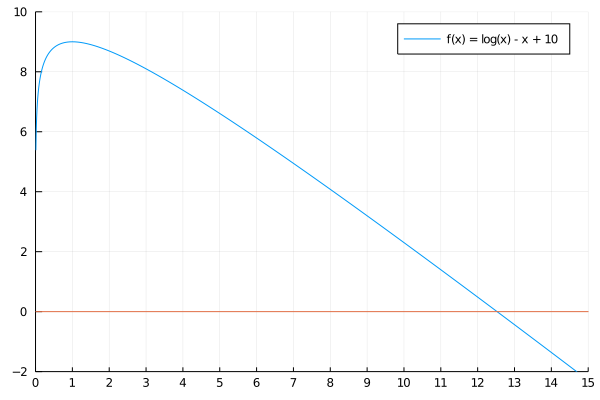

In [9]:
## Newton-Raphson method for finding the root of f
# Create input functions
f(x) = log(x) - x + 10;
df1(x) = (1/x - 1);

# Finding root of f
eps = 1e-4;
z = 2.0;
S = 1.0;
while abs(S)>eps
    global S = f(z);
    H = df1(z);
    global z = z - H\S;
end

println(@sprintf("z = %f",z));
println(@sprintf("f(z) = %f",f(z)));

# Plot
x = collect(0:0.01:15);
plot(x,f, labels = "f(x) = log(x) - x + 10")
plot!([0],seriestype="hline", labels = "")
ylims!((-2,10))
xlims!((0,15))
xticks!(0:1:15)

**Example**: Suppose we want to find the maximum of $f(x) = \log\left(x\right)\ - x  + 10$. We could do this by hand:
1. The first order condition is $f'(x)=1/x - 1 = 0 $ and $x = 1$ is a critical point.
2. The second order condition is $f''(x) = -1/x^2$ and $f''(1)=-1<0$ is locally concave. This means that $x=1$ is a maxima and the maximum is $f(x)=9$. 

We could also approximate this solution using the Newton-Raphson method using the following code.

z = 1.000000
f'(z) = 9.000000


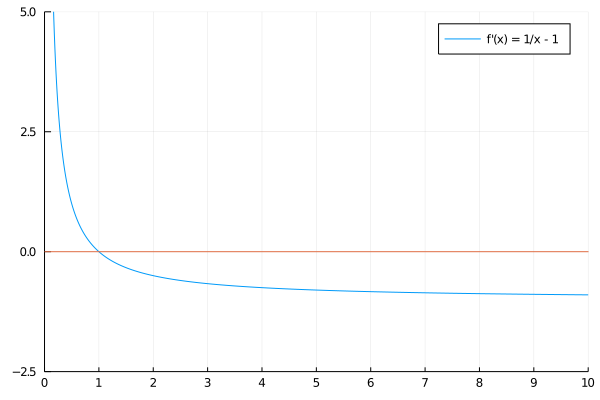

In [10]:
# Newton-Raphson method for finding root of df
# Create input functions
df2(x) = -1/x^2;

# Iteration
eps = 1e-4;
z = 2.0;
S = 1.0;
while abs(S)>eps
    S = df1(z);
    H = df2(z);
    global z = z - H\S;
    if z == 0
      global z = 1e-1;
    end
end

println(@sprintf("z = %f",z));
println(@sprintf("f'(z) = %f",f(z)));

# Plots
x = collect(0:0.01:10);
plot(x,df1, labels = "f'(x) = 1/x - 1")
plot!([0], seriestype="hline", labels = "")
ylims!((-2.5,5))
xlims!((0,10))
xticks!(0:1:10)

**Example**: The following function allows us to sample $\nu$ in the regression model using an MH step. It is based off of corresponding MATLAB code associated with [Chapter 3 of Chan (2017)](http://www.joshuachan.org/papers/BayesMacro.pdf), which is free to download from [Joshua CC Chan's personal website](http://www.joshuachan.org/notes_BayesMacro.html).

In [5]:
## Create function for MH step to sample nu
function sample_nu_MH(MC_Lam,MC_nu,pri_nu_ub)
# Define useful terms
flag = 0;
T = size(MC_Lam,1);
sum1 = sum(log.(MC_Lam));
sum2 = sum(ones(T)./MC_Lam);

# log-density of p(nu|lambda)
f_nu(x) = T*(x/2*log(x/2)- loggamma(x/2)) - (x/2+1)*sum1 - x/2*sum2;

# Derivatives for Newton-Raphson method
df_nu(x) = T/2*(log(x/2) + 1 - digamma(x/2)) - (sum1+sum2)/2;
d2f_nu(x) = T/(2*x) - T/4*trigamma(x/2);


# Initial conditions
global nut = MC_nu;
global S_nu = 1;
global H_nu = 0;

# Newton-Raphson recursion
while abs(S_nu) > 1e-4
    global S_nu = df_nu(nut);
    global H_nu = d2f_nu(nut);
    global nut = nut - H_nu\S_nu;
    if nut<2     # Ensure finite variance of t-distirbution
        global nut = 5; # Mimimum value to ensure all moments exist
        global H_nu = d2f_nu(nut);
        break;
    end
end

# Generate candiate draw
Dnu = -1/H_nu;
nuc = nut + rand(Normal(0,sqrt(Dnu)));

# MH step
if nuc > 2 && nuc < pri_nu_ub # Check boundary conditions
    lalp_MH = f_nu(nuc) - f_nu(MC_nu) - 0.5*(MC_nu-nut)^2/Dnu + 0.5*(nuc-nut)^2/Dnu; # log of acceptence probability
    if exp(lalp_MH) > rand(Uniform(0,1))
        MC_nu = nuc;
        flag = 1;
    end
end

return MC_nu, flag
end

sample_nu_MH (generic function with 1 method)

### Hyperparameters
When selecting the hyperparameter values for the prior distributions of the regression coefficients $\boldsymbol{\beta}$ and error variance $\sigma^2$, note that the same advice in the normal linear regression model applies here. 

In addition to this, note that if the choice of $\bar{\nu}$ is too small, then the MH routine will run, but place a lot of probability mass at $\bar{\nu}$. It's therefore important to check the trace plot and empirical distribution of the draws. In practice, we find that setting $\bar{\nu}=50$ works well when modeling macroeconomic variables. 


# Worked Example: Autoregressive Model with t-distributed errors
The equation system of the autoregressive model of order $p$ with t-distributed errors, denoted ARt(p), is given by
$$
y_t = \rho_0 + \rho_1 y_{t-1} + \dots + \rho_p y_{t-p} + e_t, \quad e_t\sim T(0,\sigma^2,\nu)
$$
in which $\rho_0$ is an unknown real-valued constant, $\rho_i$, $i=1,\dots,p$ are unknown AR coefficients, $\sigma^2>0$ is the unknown error variance and $\nu$ is the unknown degrees of freedom parameter. We estimate the ARt(p) model on simulated data as follows.



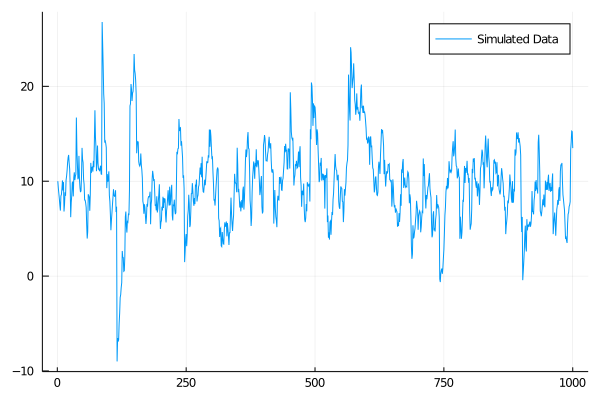

In [6]:
## Simulate Data for AR(1) process with t-distributed errors
true_beta0 = 1;   # true intercept
true_beta1 = 0.9; # true AR(1) coefficient
true_sig2 = 1;    # true variance
true_nu = 3;      # true degrees of freedom parameter

T = 1000; # no. of dates
y0 = true_beta0/(1-true_beta1); # initial condition
y = zeros(T); # storage vector

Lam = rand(InverseGamma(true_nu/2,true_nu/2),T); # latent variable
y[1] = y0;
for t = 2:T
    y[t] = true_beta0 + true_beta1*y[t-1] + rand(Normal(0,sqrt(Lam[t]*true_sig2)));
end

x = collect(1:1:T);
data = y;
plot(x,data, label="Simulated Data")

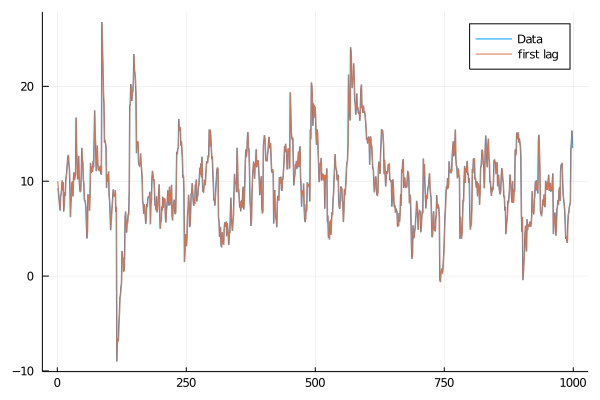

In [7]:
# Define key variables in linear regression model
p = 1;              # AR order
y0 = data[1:p];     # Initial conditions
y = data[p+1:end];  # Observations
T = size(y,1);      # Dates after removing initial conditions
X = [ones(T) data[1:end-1]]; # intercept and first lag

x = collect(1:1:T);
plot(x,y, label="Data")
plot!(x,X[:,2], label="first lag")

In [ ]:
## Gibbs Sampler
# Controls
nburn = 1000;
ndraws = nburn + 10000;

# Prior for beta
k = size(X,2); # number of regressors
pri_m = zeros(k);
pri_v = Diagonal(10*ones(k));
pri_beta = MvNormal(pri_m,pri_v);

# Prior for sig2
pri_nu = 3;
pri_S = 1*(pri_nu-1); # sets E(pri_sig2) = 1
pri_sig2 = InverseGamma(pri_S,pri_S);

# prior for nu
pri_nu_ub = 50; # Upper bound

# Storage
s_beta = zeros(ndraws-nburn,k);
s_sig2 = zeros(ndraws-nburn,1);
s_nu = zeros(ndraws-nburn,1);

# Initial conditions
MC_beta = (X'*X)\(X'*y);
MC_sig2 = (y-X*MC_beta)'*(y-X*MC_beta)/T;
MC_nu = 5;
MC_Lam = rand(InverseGamma(MC_nu/2,MC_nu/2),T);
MC_inv_Lam = Diagonal(ones(T)./MC_Lam);

# Deterministic terms in posterior
post_nu = pri_nu + T/2;
inv_priV = (pri_v)\I(k);

# Misc. terms
count_nu = 0;
flag = 0;

# MH within Gibbs Sampler
for loop in 1:ndraws
# Draw beta from multivariate Normal
    post_v = (X'*MC_inv_Lam*X./MC_sig2 + inv_priV)\I(k);
    post_m = post_v*(X'*MC_inv_Lam*y./MC_sig2 + inv_priV*pri_m);
    global MC_beta = post_m + (cholesky(Hermitian(post_v)).L)*rand(Normal(0,1),k);

# Draw sig2 from InverseGamma
    eps = y-X*MC_beta;
    post_S = pri_S + eps'*MC_inv_Lam*eps./2;
    global MC_sig2 = rand(InverseGamma(post_nu,post_S));

# Draw Lambda from InverseGamma
    post_nulam = (MC_nu+1)/2;
    post_Slam = (MC_nu.+(eps.^2)./MC_sig2)/2;
    for t in 1:T
        global MC_Lam[t] = rand(InverseGamma(post_nulam,post_Slam[t]));
    end
    global MC_inv_Lam = Diagonal(ones(T)./MC_Lam);

# Draw nu using MH step
    global (MC_nu,flag) = sample_nu_MH(MC_Lam,MC_nu,pri_nu_ub);
    global count_nu = count_nu + flag;

# Store
    if loop > nburn
        count_loop = loop - nburn;
        s_beta[count_loop,:] = transpose(MC_beta);
        s_sig2[count_loop] = MC_sig2;
        s_nu[count_loop] = MC_nu;
    end
end

## Summarize results
println(@sprintf("Acceptance ratio for MH step = %f",count_nu/ndraws))

# Trace plots
x = collect(1:(ndraws-nburn))
p1a = plot(x,s_beta[:,1], title = "Markov chain: beta0");
p1b = plot(x,s_beta[:,2], title = "Markov chain: beta1");
p1c = plot(x,s_sig2, title = "Markov chain: sig2");
p1d = plot(x,s_nu, title = "Markov chain: nu");
plot(p1a,p1b,p1c,layout = (1,3),legend=false)

# Compute posterior mean using Monte Carlo Integration
    @show post_beta = mean(s_beta,dims=1);
    @show true_beta = [true_beta0 true_beta1];

    @show post_sig2 = mean(s_sig2);
    @show true_sig2

    @show post_nu = mean(s_nu);
    @show true_nu


In [ ]:
# Plot marginal posterior distributions
x = collect(0:0.1:5);
histogram(x,s_beta[:,1], normalize=:pdf, title = "Posterior: beta0", legend = false)
plot!([true_beta0], seriestype="vline", legend = false)
p2a = plot!([post_beta[1]], seriestype="vline", legend = false)

histogram(x,s_beta[:,2], normalize=:pdf, title = "Posterior: beta1", legend = false)
plot!([true_beta1], seriestype="vline", legend = false)
p2b = plot!([post_beta[2]], seriestype="vline", legend = false)

histogram(x,s_sig2, normalize=:pdf, title = "Posterior: sig2", legend = false)
plot!([true_sig2], seriestype="vline", legend = false)
p2c = plot!([post_sig2], seriestype="vline", legend = false)

histogram(x,s_nu, normalize=:pdf, title = "Posterior: nu", label="Empirical pdf")
plot!([true_nu], seriestype="vline", label="True value")
p2d = plot!([post_nu], seriestype="vline", label="MC mean")

plot(p2a,p2b,p2c,p2d,layout = (2,2))

# Conclusion
To estimate the linear regression with Student's t-distributed errors, we can exploit the equivalence of the Student's t-distribution and an appropriate *scale mixture of normals* to derive a four-block Gibbs sampler in which the conditional distributions for the regression coefficients and error variance have the same form as in the case of the normal linear regression model.

Since the regression model provides the framework to estimate various other models, such as autoregressive and distributed lag models, we can now estimate those with t-distributed errors too.

## Recommended reading
I recommend that you check out the following alternative presentations of the same material (a different perspective might deepen your understanding of the material):
1. Chapter 3 of Joshua C. C. Chan's [Notes on Bayesian Macroeconometrics](http://joshuachan.org/notes_BayesMacro.html). 
2. Chapters 6 of Gary Koop's book [Bayesian Econometrics](https://www.amazon.com/Bayesian-Econometrics-Gary-Koop/dp/0470845678). 

